In [1]:
!pip install opencv-python

**Importing Libraries**

In [2]:
import numpy as np
import cv2
import os
from PIL import Image
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Loading and Preprocessing Images/data**

In [3]:
# Define the path to the data directory
data_path = r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data'

# Define the class labels (subdirectories)
class_labels = [
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Abhay',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Atif',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Bhanu',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Dhwani',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Hashika',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Mustafa',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Prasad',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Rahul',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Salman',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Swaijit',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Shivansh',
    r'C:\Users\itspr\Downloads\VU\Final term Face Recognition\photos-data\Yugandhar'
]

# Calculate the number of classes
num_classes = len(class_labels)

# Prepare empty lists to store the images and labels
images = []
labels = []

# Iterate over the folders and images, load the images, and append them to the list
for i, label in enumerate(class_labels):
    folder_path = os.path.join(data_path, label)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert("RGB")  # Open the image and convert it to RGB format
        image = image.resize((128, 128))  # Resize the image to the desired size
        image = np.array(image)
        images.append(image)
        labels.append(i)  # Use the index as the label for each class

# Convert the lists of images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the images and labels into train and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [4]:
x_train.shape

(576, 128, 128, 3)

**Normalizing the pixel values**

In [5]:
# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
x_train[0]

array([[[0.9019608 , 0.8980392 , 0.8901961 ],
        [0.9019608 , 0.8980392 , 0.8901961 ],
        [0.90588236, 0.89411765, 0.8901961 ],
        ...,
        [0.9019608 , 0.8862745 , 0.88235295],
        [0.9019608 , 0.8862745 , 0.88235295],
        [0.9019608 , 0.8862745 , 0.88235295]],

       [[0.90588236, 0.89411765, 0.8901961 ],
        [0.9098039 , 0.89411765, 0.8901961 ],
        [0.90588236, 0.8901961 , 0.8862745 ],
        ...,
        [0.9019608 , 0.8862745 , 0.8862745 ],
        [0.9019608 , 0.8862745 , 0.88235295],
        [0.9019608 , 0.8862745 , 0.88235295]],

       [[0.9098039 , 0.89411765, 0.8901961 ],
        [0.90588236, 0.8901961 , 0.8862745 ],
        [0.90588236, 0.8901961 , 0.8862745 ],
        ...,
        [0.8980392 , 0.89411765, 0.8862745 ],
        [0.8980392 , 0.8901961 , 0.8862745 ],
        [0.9019608 , 0.8901961 , 0.8862745 ]],

       ...,

       [[0.7882353 , 0.7882353 , 0.79607844],
        [0.78431374, 0.78039217, 0.79607844],
        [0.7764706 , 0

In [7]:
print (x_train.shape)
print (x_test.shape)

(576, 128, 128, 3)
(144, 128, 128, 3)


**Flattening the Images**

In [8]:
# Reshape the training and test sets
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

# Print the shapes of the training and test sets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (576, 49152)
Test set shape: (144, 49152)


**Creating the Autoencoder Model**

In [9]:
# The size of encoded and actual representations
encoding_dim = 64

# Define the input shape
input_shape = (49152,)

# Encoder
input_img = Input(shape=input_shape)
encoded = Dense(32, activation='relu')(input_img)  # Add a hidden layer with 32 units and ReLU activation
encoded = Dense(64, activation='relu')(encoded)  # Add another hidden layer with 64 units and ReLU activation
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Add another hidden layer with encoding_dim units and ReLU activation

# Decoder
decoded = Dense(64, activation='relu')(encoded)  # Add a hidden layer with 64 units and ReLU activation
decoded = Dense(64, activation='relu')(decoded)  # Add another hidden layer with 64 units and ReLU activation
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)  # Add the output layer with sigmoid activation

# Autoencoder Model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

**Training the Autoencoder Model**

In [10]:
#Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=80,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/80
18/18 [==============================] - 4s 139ms/step - loss: 0.0494 - val_loss: 0.0310
Epoch 2/80
18/18 [==============================] - 2s 120ms/step - loss: 0.0314 - val_loss: 0.0302
Epoch 3/80
18/18 [==============================] - 2s 128ms/step - loss: 0.0304 - val_loss: 0.0285
Epoch 4/80
18/18 [==============================] - 2s 128ms/step - loss: 0.0247 - val_loss: 0.0229
Epoch 5/80
18/18 [==============================] - 2s 125ms/step - loss: 0.0207 - val_loss: 0.0206
Epoch 6/80
18/18 [==============================] - 2s 130ms/step - loss: 0.0183 - val_loss: 0.0179
Epoch 7/80
18/18 [==============================] - 2s 128ms/step - loss: 0.0159 - val_loss: 0.0153
Epoch 8/80
18/18 [==============================] - 2s 128ms/step - loss: 0.0144 - val_loss: 0.0140
Epoch 9/80
18/18 [==============================] - 2s 129ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 10/80
18/18 [==============================] - 2s 131ms/step - loss: 0.0129 - val_loss: 0.0124

**Plotting the Loss Curve**

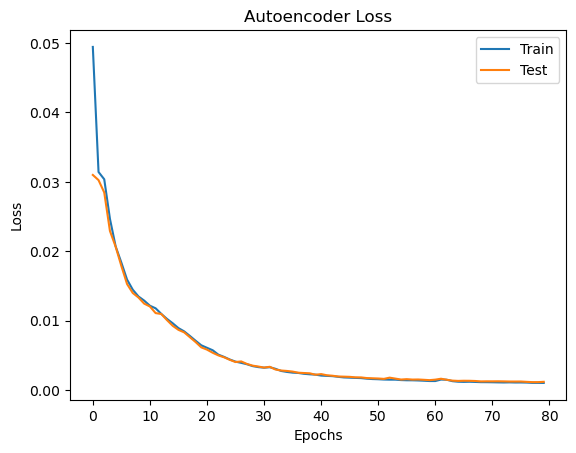

In [11]:
# Plot the loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

**Generating Reconstructed Images**

In [12]:
# Encode and decode some images
decoded_imgs = autoencoder.predict(x_test)

5/5 [==============================] - 0s 11ms/step


In [13]:
decoded_imgs.shape

(144, 49152)

**Visualizing original and reconstructed images**

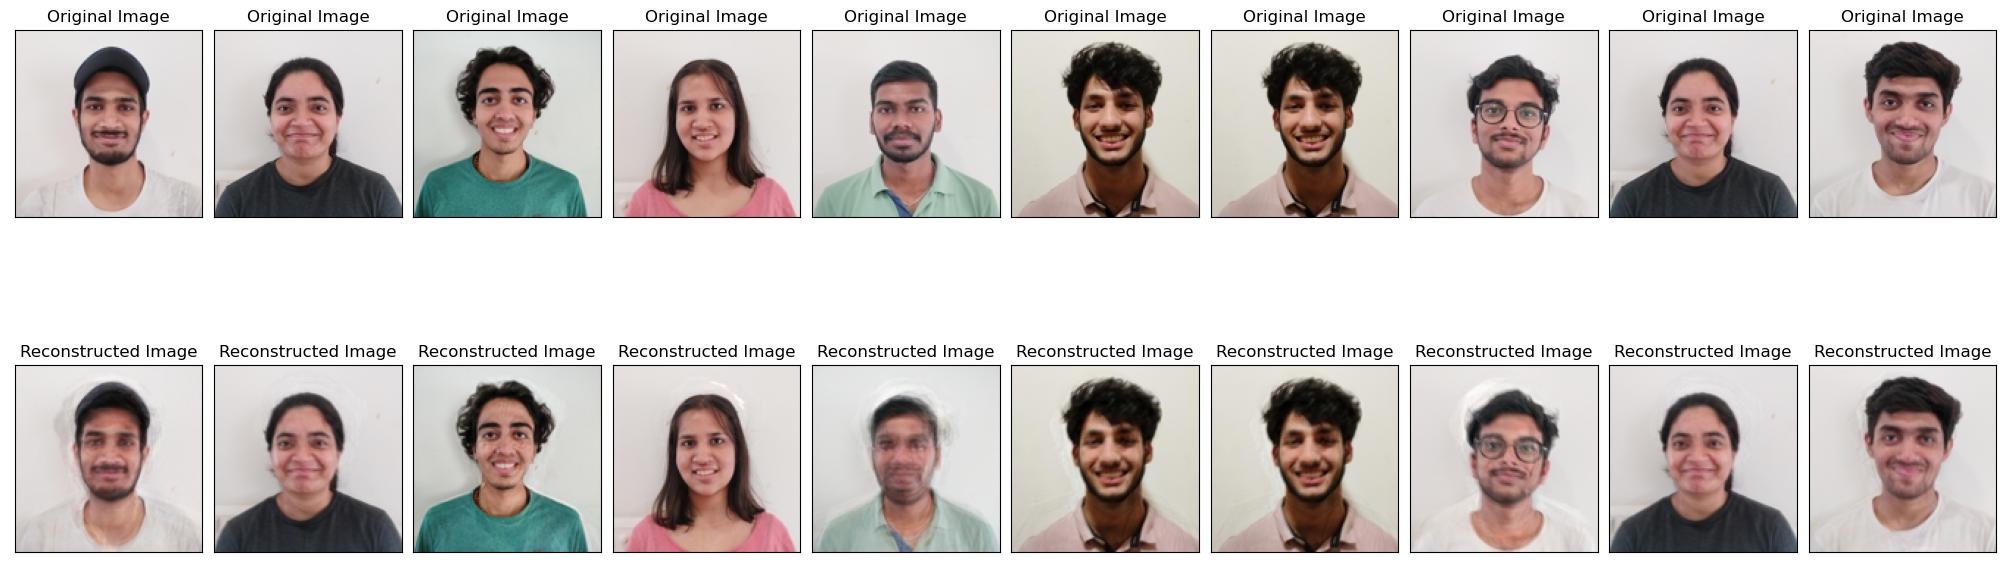

In [14]:
n = 10  # Number of images to display
rows = 2  # Number of rows to display the images
cols = n  # Number of columns to display the images
fig, axs = plt.subplots(rows, cols, figsize=(20, 8))  # Create subplots

for i in range(n):
    # Display original image with name
    ax = axs[0, i]
    ax.imshow(x_test[i].reshape(128, 128, 3))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Original Image')

    # Display reconstructed image with name
    ax = axs[1, i]
    ax.imshow(decoded_imgs[i].reshape(128, 128, 3))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Reconstructed Image')

plt.tight_layout(pad=0.5)  # Add space between subplots
plt.show()


# CLASSIFICATION

In [15]:
# Create a classification model based on the encoder
classification_input = Input(shape=input_shape)
classification_hidden = Dense(256, activation='relu')(classification_input)  # Add a hidden layer with 256 units and ReLU activation
classification_output = Dense(num_classes, activation='softmax')(classification_hidden)  # Add the output layer with softmax activation

classification_model = Model(classification_input, classification_output)

# Compile the classification model
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classification model using the encoded representations as inputs
classification_history = classification_model.fit(decoded_imgs, y_test,
                                                  epochs=50,
                                                  batch_size=32,
                                                  shuffle=True,
                                                  validation_split=0.2)

# Evaluate the classification model
classification_loss, classification_accuracy = classification_model.evaluate(decoded_imgs, y_test)

# Print the classification accuracy
print("Classification Accuracy:", classification_accuracy)

Epoch 1/50
4/4 [==============================] - 2s 277ms/step - loss: 55.5920 - accuracy: 0.0696 - val_loss: 55.7828 - val_accuracy: 0.1034
Epoch 2/50
4/4 [==============================] - 1s 211ms/step - loss: 55.7873 - accuracy: 0.1130 - val_loss: 33.8569 - val_accuracy: 0.1034
Epoch 3/50
4/4 [==============================] - 1s 208ms/step - loss: 31.7230 - accuracy: 0.1652 - val_loss: 14.2907 - val_accuracy: 0.2069
Epoch 4/50
4/4 [==============================] - 1s 212ms/step - loss: 15.8156 - accuracy: 0.0957 - val_loss: 5.0839 - val_accuracy: 0.5172
Epoch 5/50
4/4 [==============================] - 1s 210ms/step - loss: 6.8694 - accuracy: 0.2609 - val_loss: 4.8594 - val_accuracy: 0.2414
Epoch 6/50
4/4 [==============================] - 1s 209ms/step - loss: 4.8145 - accuracy: 0.1652 - val_loss: 3.5659 - val_accuracy: 0.2414
Epoch 7/50
4/4 [==============================] - 1s 210ms/step - loss: 3.6646 - accuracy: 0.1652 - val_loss: 2.1736 - val_accuracy: 0.2759
Epoch 8/50
4/

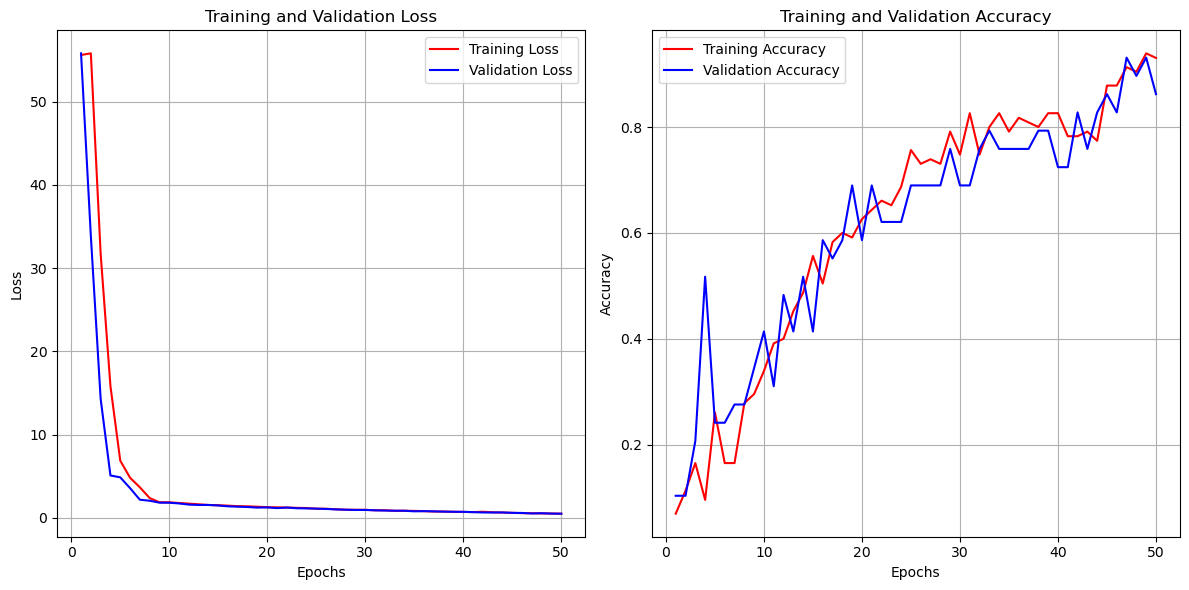

In [16]:
import matplotlib.pyplot as plt

# Loss plot
classification_loss_values = classification_history.history['loss']
classification_val_loss_values = classification_history.history['val_loss']
classification_epochs = range(1, len(classification_loss_values) + 1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
axes[0].plot(classification_epochs, classification_loss_values, 'r', label='Training Loss')
axes[0].plot(classification_epochs, classification_val_loss_values, 'b', label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Accuracy plot
classification_accuracy_values = classification_history.history['accuracy']
classification_val_accuracy_values = classification_history.history['val_accuracy']

# Plot training and validation accuracy
axes[1].plot(classification_epochs, classification_accuracy_values, 'r', label='Training Accuracy')
axes[1].plot(classification_epochs, classification_val_accuracy_values, 'b', label='Validation Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plot

5/5 [==============================] - 0s 15ms/step


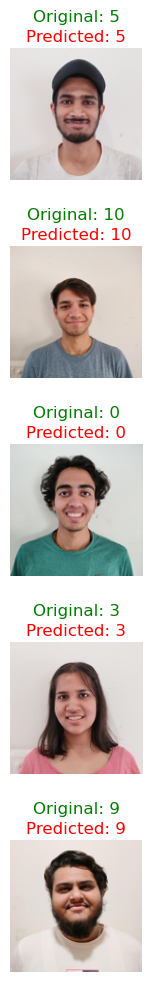

In [17]:
# Predict labels using the classification model
predicted_labels = classification_model.predict(decoded_imgs)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Select random images from the test set
num_images = 5
random_indices = np.random.choice(range(len(x_test)), num_images, replace=False)
original_images = x_test[random_indices]
predicted_classes = predicted_labels[random_indices]

# Reshape the images for plotting
original_images = original_images.reshape((num_images, 128, 128, 3))

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=num_images, ncols=1, figsize=(4, 12))

for i in range(num_images):
    original_label = y_test[random_indices[i]]
    predicted_label = predicted_classes[i]
    
    axes[i].text(0.5, 1.2, f'Original: {original_label}', color='green', fontsize=12, ha='center', transform=axes[i].transAxes)
    axes[i].text(0.5, 1.05, f'Predicted: {predicted_label}', color='red', fontsize=12, ha='center', transform=axes[i].transAxes)
    axes[i].imshow(original_images[i])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()